In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
RANDOM_SEED=25
df = pd.read_csv('data/filmdeathcounts.csv', sep=',')

# Homework 3

In [50]:
def categorize_func(split_points):
    def categorize(param):
        split_points.sort()
        if (param < split_points[0]):
            return '<' + str(split_points[0])
        for index in range(len(split_points) - 1):
            if param < split_points[index + 1]:
                return '≥' + str(split_points[index])
        return '≥' + str(split_points[-1])
    return categorize

def make_relative(probabilites_df):
    res = probabilites_df.copy()
    res.drop(index='Total', columns='Total', inplace=True)
    for col in res:
        for row in res[col].index:
            res[col][row] /= probabilites_df['Total'][row]
    return res

def make_quetelet(probabilites_df):
    res = probabilites_df.copy()
    res.drop(index='Total', columns='Total', inplace=True)
    for col in res:
        for row in res[col].index:
            res[col][row] = (probabilites_df[col][row] / probabilites_df['Total'][row] - probabilites_df[col]['Total']) / \
                             probabilites_df[col]['Total']
    return res


In [36]:
bodies = df['Body_Count'].apply(categorize_func([10, 100, 200]))
imdb_rating = df['IMDB_Rating'].apply(categorize_func([5.0, 7.0, 8.0]))
year = df['Year'].apply(categorize_func([1990, 2000, 2005]))

contingency_table_imdb_bodies = pd.crosstab(bodies, imdb_rating, margins=True, margins_name='Total', normalize='all')
contingency_table_year_bodies = pd.crosstab(bodies, year, margins=True, margins_name='Total', normalize='all')

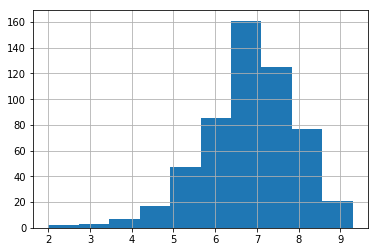

In [7]:
df['IMDB_Rating'].hist()

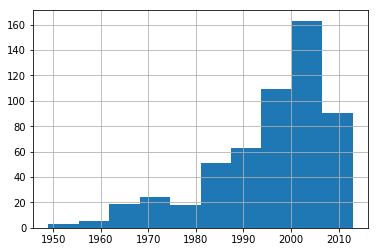

In [5]:
df['Year'].hist()

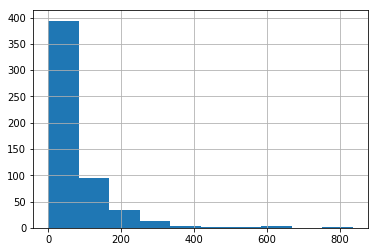

In [28]:
df['Body_Count'].hist()

In [47]:
contingency_table_imdb_bodies * 100

IMDB_Rating,<5.0,≥5.0,≥7.0,≥8.0,Total
Body_Count,,,,,
<10,0.917431,7.522936,5.137615,2.752294,16.330275
≥10,2.935780,31.743119,18.165138,8.623853,61.467890
≥100,1.284404,5.504587,5.871560,2.568807,15.229358
≥200,0.183486,1.834862,4.220183,0.733945,6.972477
Total,5.321101,46.605505,33.394495,14.678899,100.000000


In [23]:
contingency_table_year_bodies * 100

Year,<1990,≥1990,≥2000,≥2005,Total
Body_Count,,,,,
<10,3.302752,3.119266,5.321101,4.587156,16.330275
≥10,13.944954,19.082569,11.192661,17.247706,61.467890
≥100,6.605505,2.201835,3.119266,3.302752,15.229358
≥200,1.284404,1.100917,1.834862,2.752294,6.972477
Total,25.137615,25.504587,21.467890,27.889908,100.000000


In [51]:
make_relative(contingency_table_imdb_bodies) * 100

IMDB_Rating,<5.0,≥5.0,≥7.0,≥8.0
Body_Count,,,,
<10,5.617978,46.067416,31.460674,16.853933
≥10,4.776119,51.641791,29.552239,14.029851
≥100,8.433735,36.144578,38.554217,16.867470
≥200,2.631579,26.315789,60.526316,10.526316


We can see that film with more than 200 bodies probably will be well appreciated (will have rating more than 7.0 with ~71% chances and ~3% chances to have rating lower than 5.0)

In [52]:
make_relative(contingency_table_year_bodies) * 100

Year,<1990,≥1990,≥2000,≥2005
Body_Count,,,,
<10,20.224719,19.101124,32.584270,28.089888
≥10,22.686567,31.044776,18.208955,28.059701
≥100,43.373494,14.457831,20.481928,21.686747
≥200,18.421053,15.789474,26.315789,39.473684


I don't see patterns here

In [37]:
make_quetelet(contingency_table_imdb_bodies) * 100

IMDB_Rating,<5.0,≥5.0,≥7.0,≥8.0
Body_Count,,,,
<10,5.579233,-1.154561,-5.790838,14.817416
≥10,-10.241894,10.806205,-11.505659,-4.421642
≥100,58.496053,-22.445688,15.450814,14.909639
≥200,-50.544465,-43.535019,81.246385,-28.289474


1. Films that have from 100 to 199 bodies have odds to have rating lower than 5.0 ~58% more than average
2. Films that have 200 or more bodies have odds to have rating higher than 7.0 ~81% more than average

In [25]:
make_quetelet(contingency_table_year_bodies) * 100

Year,<1990,≥1990,≥2000,≥2005
Body_Count,,,,
<10,-19.544001,-25.107105,51.781427,0.717031
≥10,-9.750517,21.722324,-15.180508,0.608798
≥100,72.544191,-43.312820,-4.592730,-22.241598
≥200,-26.719170,-38.091632,22.582096,41.533934


1. Films that have from 100 to 199 bodies are most probably made before 1990 (probability is ~73% more than average)
2. Films that have 200 or more bodies are most probably made after 2005 (probability is ~41% more than average)